In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
planets = sns.load_dataset("planets")
display(planets.head())

# Display some of the general information
display(planets.info())

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


None

In [7]:
planets.dropna(axis=0, inplace=True)

In [8]:
planets.describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


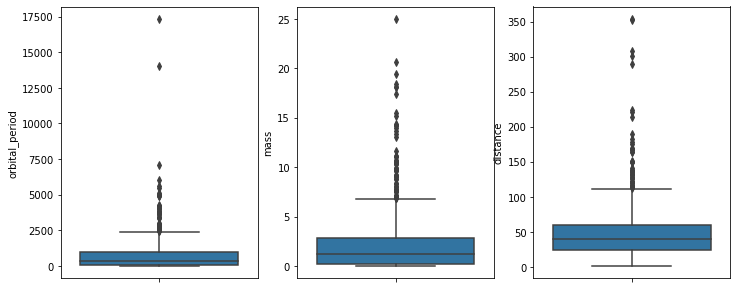

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 5));

sns.boxplot(y=planets["orbital_period"], ax=ax1)
sns.boxplot(y=planets["mass"], ax=ax2)
sns.boxplot(y=planets["distance"], ax=ax3)

plt.show()

In [26]:
planets.index.size
planets.iloc[0]

planets.describe().loc['25%', 'orbital_period']

38.27225

In [29]:
num_indx = range(planets.index.size)
oribital_upperbound = 1.5*planets.describe().loc['75%', 'orbital_period']
orbital_lowerbound = 1.5*planets.describe().loc['25%', 'orbital_period']

index_to_drop = [i for i in num_indx if (planets.loc[i, 'orbital_period'] >= oribital_upperbound) | (planets.loc[i, 'orbital_period'] < orbital_lowerbound)]

KeyError: 7

In [30]:
#NEXT 
# Load in the data!

penguins = sns.load_dataset("penguins")

# Remove NaNs and nulls
penguins.dropna(inplace=True)

display(penguins.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [47]:
# Imports!
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Set-up the one-hot encoder method
categorical_features = ['species']
categorical_transformer = OneHotEncoder()


# Set up our preprocessor/column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [48]:
# Select features
features = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# Encode the 'sex' column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['sex_encode'] = le.fit_transform(penguins['sex'])

# Set target array
y = penguins['sex_encode']

In [49]:
# Apply the pipeline

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model with our logistic regression classifier
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.476


In [50]:
#Objective 3
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

transformer = ColumnTransformer(transformers = [('cat', OneHotEncoder(), ['species'])])
clf = Pipeline(steps = [('preproccessing', transformer), ('Classifier', DecisionTreeClassifier())])

In [62]:
penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)

# Select features
features = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

# Encode the 'sex' column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['sex_encode'] = le.fit_transform(penguins['sex'])

# Set target array
y = penguins['sex_encode']

# Apply the pipeline

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model with our logistic regression classifier
clf = clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.429


In [64]:
import sklearn.tree as tree
tree.plot_tree(clf)

NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [65]:
#Objective 4
from sklearn.datasets import load_wine
import pandas as pd

# Load the data and convert to a DataFrame
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = pd.Series(data.target)

display(df_wine.shape)
df_wine.head()

(178, 14)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [81]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np

In [78]:
classifier = tree.DecisionTreeClassifier()
target = 'target'
x = df_wine.drop(target, axis=1)
y = df_wine[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [79]:
classifier.fit(x_train, y_train)
print(f'The classifier accuracy score is: {classifier.score(x_test, y_test)}')

The classifier accuracy score is: 0.9111111111111111


<AxesSubplot:>

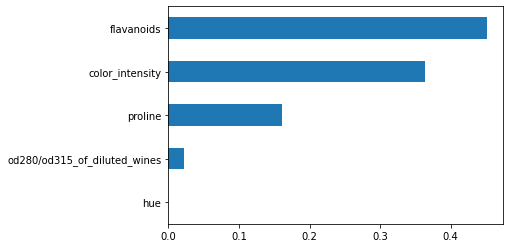

In [91]:
import matplotlib.pyplot as plt

importances = pd.Series(classifier.feature_importances_, x_train.columns)
importances.sort_values()[-5:].plot.barh()
